# P3: OpenStreetMap Data Case Study. Dubai and Abu-Dhabi.

### 0. Code Resources

#### 0.1. Code Library

In [1]:
library(devtools)

In [2]:
library(RColorBrewer)

In [3]:
library(formattable)

In [5]:
library(ggmap)

In [6]:
install.packages('osmar')

also installing the dependency ‘XML’

Warning message in install.packages("osmar"):
“installation of package ‘XML’ had non-zero exit status”Warning message in install.packages("osmar"):
“installation of package ‘osmar’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
library(RSQLite)

In [ ]:
library(sqldf)

Loading required package: gsubfn
Loading required package: proto


In [ ]:
library(jsonlite)

In [ ]:
library(mongolite)

In [ ]:
library(plotly)

In [15]:
install.packages('RMongo')

also installing the dependency ‘rJava’

Warning message in install.packages("RMongo"):
“installation of package ‘rJava’ had non-zero exit status”Warning message in install.packages("RMongo"):
“installation of package ‘RMongo’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [40]:
# Not installed

In [12]:
# library(osmplotr)

In [13]:
# library(geojsonio)

In [7]:
# devtools::install_github("ropenscilabs/osmplotr")

In [16]:
# devtools::install_github("ropensci/plotly")

In [18]:
# install.packages('ggforce')

In [18]:
# install.packages("rgeos") 

In [21]:
# install.packages("mapview")

In [21]:
# library(ggforce)

In [22]:
# library(rgeos)

In [23]:
# library(mapview)

In [24]:
# Not used

In [27]:
library(bigmemory)

In [29]:
install.packages('rio')

also installing the dependencies ‘rematch’, ‘triebeard’, ‘hms’, ‘cellranger’, ‘urltools’, ‘haven’, ‘openxlsx’, ‘readODS’, ‘xml2’, ‘readxl’, ‘readr’, ‘csvy’

Warning message in install.packages("rio"):
“installation of package ‘readxl’ had non-zero exit status”Warning message in install.packages("rio"):
“installation of package ‘haven’ had non-zero exit status”Warning message in install.packages("rio"):
“installation of package ‘rio’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [32]:
library(dygraphs)

In [33]:
install.packages('highcharter')

also installing the dependencies ‘mnormt’, ‘XML’, ‘psych’, ‘rlist’, ‘broom’, ‘lubridate’

Warning message in install.packages("highcharter"):
“installation of package ‘XML’ had non-zero exit status”Warning message in install.packages("highcharter"):
“installation of package ‘rlist’ had non-zero exit status”Warning message in install.packages("highcharter"):
“installation of package ‘highcharter’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [34]:
library(rbokeh)

In [36]:
library(maps)

In [41]:
library(R2HTML)

#### 0.2. Useful links


https://wiki.openstreetmap.org/wiki/OSM_XML

https://www.datacamp.com/community/tutorials/r-data-import-tutorial#gs.jUE2UHw

http://www2.uaem.mx/r-mirror/web/packages/osmar/osmar.pdf

https://www.researchgate.net/publication/274740645_Harnessing_open_street_map_data_with_R_and_QGIS

https://cran.r-project.org/web/packages/mongolite/vignettes/intro.html

https://journal.r-project.org/archive/2013-1/eugster-schlesinger.pdf

http://www.joyofdata.de/blog/mongodb-state-of-the-r-rmongodb/

https://edzer.github.io/sp/

https://cran.r-project.org/web/packages/ggmap/ggmap.pdf

https://media.readthedocs.org/pdf/jupyter-notebook/latest/jupyter-notebook.pdf

https://journal.r-project.org/archive/2013-1/kahle-wickham.pdf

https://www.r-bloggers.com/r-and-mongodb/

https://cran.r-project.org/web/packages/mongolite/mongolite.pdf

https://www.r-bloggers.com/r-and-sqlite-part-1/

https://www.datacamp.com/community/tutorials/importing-data-r-part-two#gs._PEI6iY

https://cran.r-project.org/web/packages/rio/vignettes/rio.html


http://flovv.github.io/Gas_price-Mapping/


### 1. Map Area
#### 1.1.  The map
I have chosed the map sector of the dynamically developing area in the UAE.

For displaying the area I have used the  package "ggmap" and the coordinates of this area in dubai_abu-dhabi.osm.

#### bounds: minlat="23.7350" minlon="53.5800" maxlat="26.5390" maxlon="56.8870"

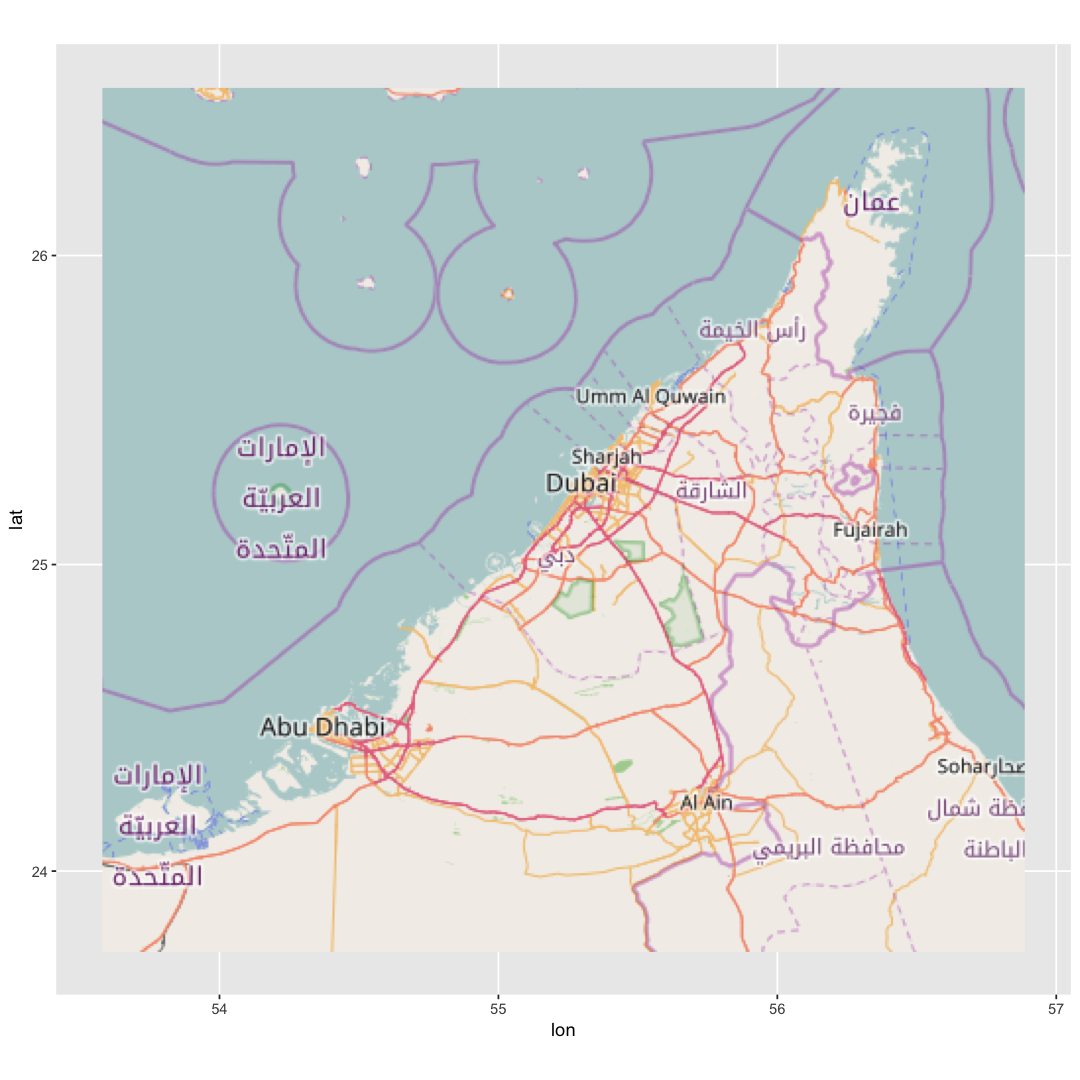

In [57]:
options(repr.plot.width = 9, repr.plot.height = 9)
osmmap <- get_map(location = c(53.5800,23.7350,56.8870,26.5390), source = "osm")
ggmap(osmmap, extent = "normal")


The reader can see some examples of use the ggmap package besides just displaying the maps.

In [64]:
gc01 <- geocode("Jumerah Gardens", output = "more")
formattable(data.frame(gc01))

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jumerah%20Gardens&sensor=false


lon      lat      type  loctype         
1 55.23334 25.19214 route geometric_center
  address                                    north    south    east    
1 jumeirah rd - dubai - united arab emirates 25.25122 25.13286 55.27856
  west     route         locality administrative_area_level_1
1 55.18782 Jumeirah Road Dubai    Dubai                      
  country             
1 United Arab Emirates

In [66]:
gc03 <- geocode("Dubai International Airport", output = "more")
formattable(data.frame(gc03))

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dubai%20International%20Airport&sensor=false


lon      lat      type    loctype    
1 55.36567 25.25317 airport approximate
  address                                                    north    south   
1 dubai international airport - dubai - united arab emirates 25.25452 25.25183
  east     west     establishment               locality
1 55.36702 55.36432 Dubai International Airport Dubai   
  administrative_area_level_1 country             
1 Dubai                       United Arab Emirates

In [68]:
formattable(data.frame(revgeocode(gc02, output = "more")))

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=25.1921354,55.233337&sensor=false


address                                           street_number
1 23 Al Athar Street - Dubai - United Arab Emirates 23           
  route           political         locality administrative_area_level_1
1 Al Athar Street Al Jumeira Second Dubai    Dubai                      
  country             
1 United Arab Emirates

In [65]:
gc02 <- as.numeric(geocode("Jumerah Gardens"))
gc02

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jumerah%20Gardens&sensor=false


[1] 55.23334 25.19214

In [69]:
formattable(data.frame(revgeocode(gc04, output = "more")))

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=25.2531745,55.3656728&sensor=false


address                                                   
1 Dubai International Airport - Dubai - United Arab Emirates
  establishment               locality administrative_area_level_1
1 Dubai International Airport Dubai    Dubai                      
  country             
1 United Arab Emirates

In [70]:
formattable(data.frame(mapdist("dubai", "abu-dhabi")))

by using this function you are agreeing to the terms at :
http://code.google.com/apis/maps/documentation/distancematrix/

Information from URL : http://maps.googleapis.com/maps/api/distancematrix/json?origins=dubai&destinations=abu-dhabi&mode=driving&sensor=false


from  to        m      km      miles    seconds minutes  hours   
1 dubai abu-dhabi 145689 145.689 90.53114 7169    119.4833 1.991389

In [67]:
gc04 <- as.numeric(geocode("Dubai International Airport"))
gc04

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dubai%20International%20Airport&sensor=false


[1] 55.36567 25.25317

In [71]:
formattable(data.frame(mapdist("Jumerah Gardens", "Dubai International Airport")))

by using this function you are agreeing to the terms at :
http://code.google.com/apis/maps/documentation/distancematrix/

Information from URL : http://maps.googleapis.com/maps/api/distancematrix/json?origins=Jumerah+Gardens&destinations=Dubai+International+Airport&mode=driving&sensor=false


from            to                          m     km     miles   seconds
1 Jumerah Gardens Dubai International Airport 18313 18.313 11.3797 1291   
  minutes  hours    
1 21.51667 0.3586111

In [72]:
var_ways <- route('The Dubai Moll', 'Business Bay', alternatives = TRUE)
formattable(head(data.frame(var_ways)))

Information from URL : http://maps.googleapis.com/maps/api/directions/json?origin=The+Dubai+Moll&destination=Business+Bay&mode=driving&units=metric&alternatives=true&sensor=false


m   km    miles     seconds minutes   hours       startLon startLat endLon  
1  60 0.060 0.0372840   7     0.1166667 0.001944444 55.27728 25.19972 55.27768
2 568 0.568 0.3529552 146     2.4333333 0.040555556 55.27768 25.20011 55.28116
3 120 0.120 0.0745680  21     0.3500000 0.005833333 55.28116 25.19707 55.28218
4 271 0.271 0.1683994  35     0.5833333 0.009722222 55.28218 25.19650 55.28070
5  45 0.045 0.0279630  27     0.4500000 0.007500000 55.28070 25.19454 55.28095
6 107 0.107 0.0664898  41     0.6833333 0.011388889 55.28095 25.19422 55.28014
  endLat   leg route
1 25.20011 1   A    
2 25.19707 2   A    
3 25.19650 3   A    
4 25.19454 4   A    
5 25.19422 5   A    
6 25.19361 6   A

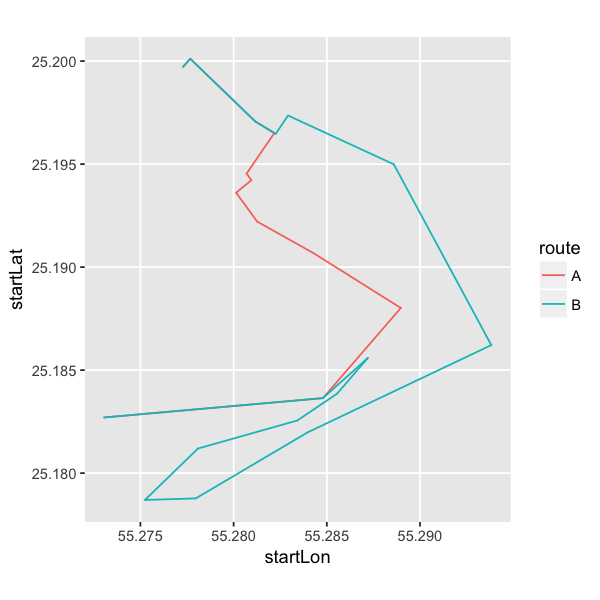

In [73]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(data = var_ways) + geom_leg(aes(x = startLon, xend = endLon, y = startLat, yend = endLat, color = route)) + coord_map()

In [74]:
options(repr.plot.width = 10, repr.plot.height = 6)

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=25.19,55.282&zoom=15&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”

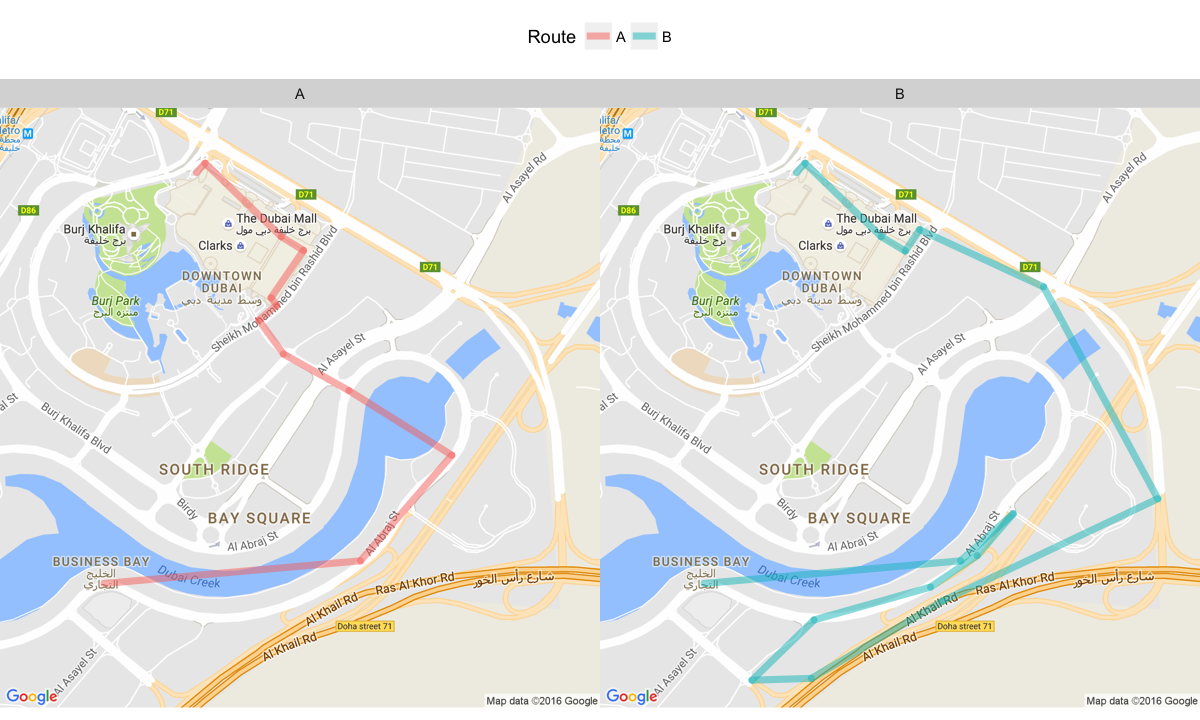

In [75]:
qmap(location=c(55.2820, 25.1900), zoom = 15, maptype = 'roadmap', base_layer = ggplot(aes(x = startLon, y = startLat), data = var_ways)) +
geom_leg(aes(x = startLon, xend = endLon, y = startLat, yend = endLat, color = route), alpha = 0.5, size = 2, data = var_ways) +
labs(x = 'Longitude', y = 'Latitude', colour = 'Route') +
facet_wrap(~ route, ncol = 3) + theme(legend.position = 'top')

In [76]:
options(repr.plot.width = 10, repr.plot.height = 10)

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=25.19,55.282&zoom=15&size=640x640&scale=2&maptype=hybrid&language=en-EN&sensor=false


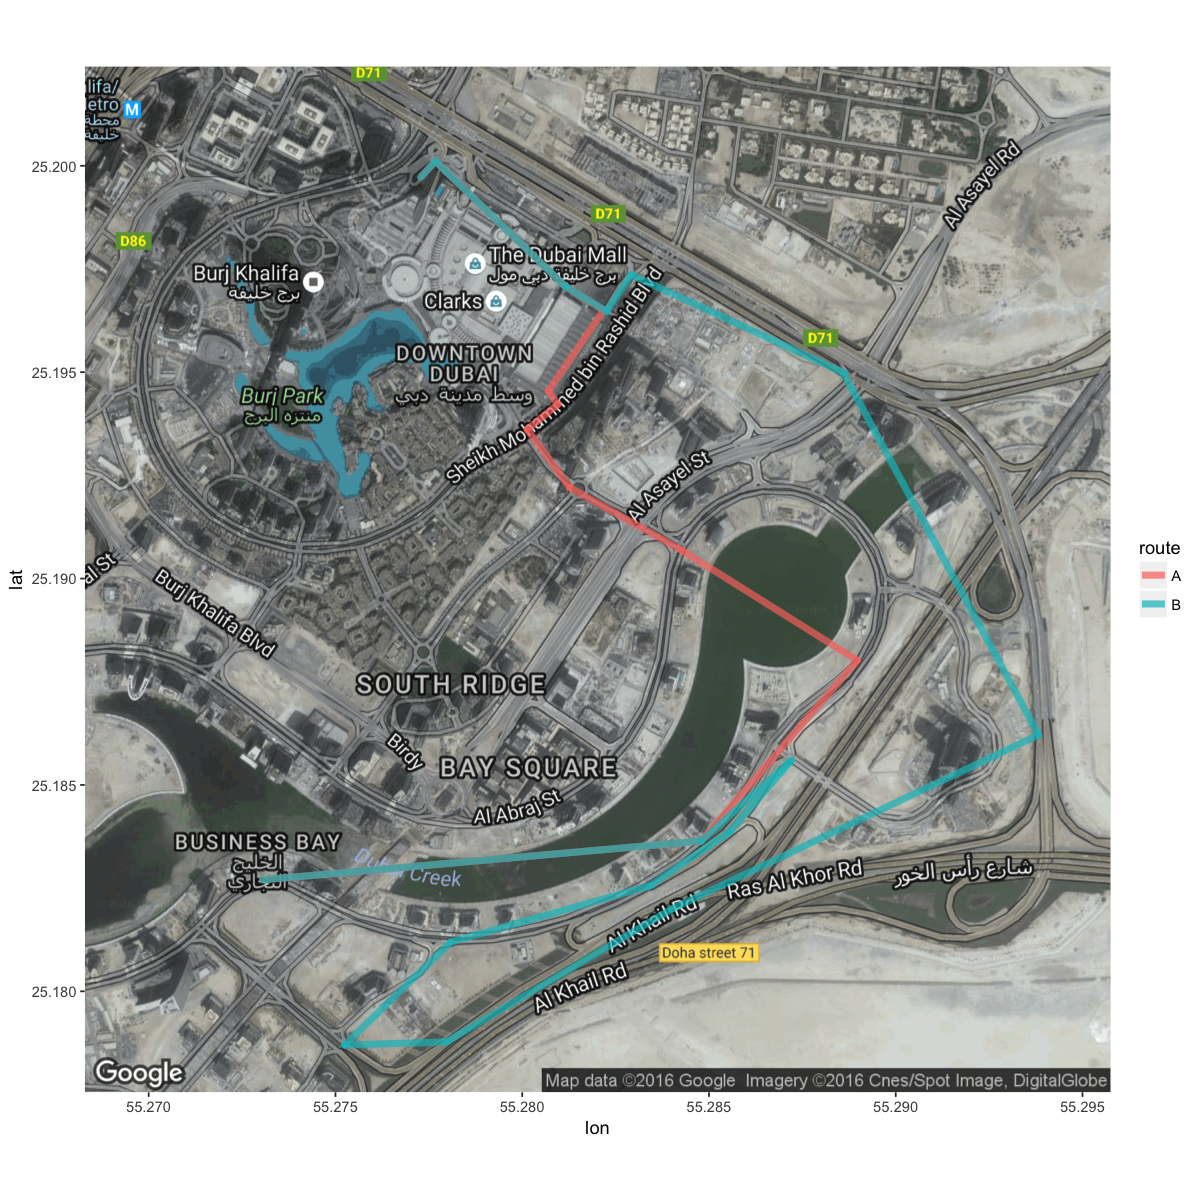

In [77]:
way_map <- get_map(location = c(55.2820, 25.1900), source = "google", zoom = 15, maptype = "hybrid")
ggmap(way_map) + geom_leg(data = var_ways, aes(x = startLon, xend = endLon, y = startLat, yend = endLat, color = route), alpha = 0.7, size = 2)

#### 1.2 Extract with osmar R
There are several ways to extract geodata. One of them is to do this with this R code cell.

This set of commands allows us to upload the data using the coordinates.

In [78]:
src <- osmsource_api()

In [79]:
smallbox <- center_bbox(55.2708, 25.2048, 1000, 1000)
sdubai <- get_osm(smallbox, source = src)

In [80]:
str(sdubai)

List of 3
 $ nodes    :List of 2
  ..$ attrs:'data.frame':	1558 obs. of  9 variables:
  .. ..$ id       : num [1:1558] 9.40e+07 1.12e+09 1.12e+09 1.12e+09 1.12e+09 ...
  .. ..$ visible  : Factor w/ 1 level "true": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ timestamp: POSIXlt[1:1558], format: "2010-12-02 13:32:04" "2012-08-14 22:09:32" ...
  .. ..$ version  : num [1:1558] 5 2 1 2 2 2 2 2 2 3 ...
  .. ..$ changeset: num [1:1558] 6514690 12732672 7103923 12732672 12732672 ...
  .. ..$ user     : Factor w/ 48 levels "Alex111X","andi9876",..: 39 42 42 42 42 42 42 42 42 42 ...
  .. ..$ uid      : Factor w/ 48 levels "10927","114220",..: 1 15 15 15 15 15 15 15 15 15 ...
  .. ..$ lat      : num [1:1558] 25.2 25.2 25.2 25.2 25.2 ...
  .. ..$ lon      : num [1:1558] 55.3 55.3 55.3 55.3 55.3 ...
  ..$ tags :'data.frame':	228 obs. of  3 variables:
  .. ..$ id: num [1:228] 6.04e+08 6.04e+08 6.04e+08 6.04e+08 6.04e+08 ...
  .. ..$ k : Factor w/ 43 levels "addr:city","addr:housenumber",..: 29 19 34 43 18 28 15

In [88]:
bigbox <- center_bbox(55.2708, 25.2048, 6000, 6000)
bdubai <- get_osm(bigbox, source = src)

In [89]:
str(bdubai)

List of 3
 $ nodes    :List of 2
  ..$ attrs:'data.frame':	47501 obs. of  9 variables:
  .. ..$ id       : num [1:47501] 30593914 30593915 31473923 31474006 31474005 ...
  .. ..$ visible  : Factor w/ 1 level "true": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ timestamp: POSIXlt[1:47501], format: "2016-08-19 09:40:14" "2010-12-14 12:40:14" ...
  .. ..$ version  : num [1:47501] 19 4 2 5 5 5 2 5 2 2 ...
  .. ..$ changeset: num [1:47501] 41552017 6657884 6514101 7313392 7313392 ...
  .. ..$ user     : Factor w/ 203 levels "08xavstj","12Katniss",..: 61 173 173 183 183 183 173 173 173 78 ...
  .. ..$ uid      : Factor w/ 203 levels "1069176","10927",..: 60 2 2 41 41 41 2 2 2 81 ...
  .. ..$ lat      : num [1:47501] 25.2 25.2 25.2 25.2 25.2 ...
  .. ..$ lon      : num [1:47501] 55.3 55.3 55.3 55.3 55.3 ...
  ..$ tags :'data.frame':	1956 obs. of  3 variables:
  .. ..$ id: num [1:1956] 9.11e+07 9.50e+07 9.50e+07 2.60e+08 2.81e+08 ...
  .. ..$ k : Factor w/ 104 levels "access","addr:city",..: 36 36 72 12 8

In [90]:
node_tags <- sort(unique(bdubai$nodes$tags$k))
print(node_tags)

  [1] access                          addr:city                      
  [3] addr:country                    addr:flats                     
  [5] addr:housename                  addr:housenumber               
  [7] addr:place                      addr:postcode                  
  [9] addr:street                     addr:subdistrict               
 [11] aeroway                         amenity                        
 [13] barrier                         bench                          
 [15] bicycle                         building                       
 [17] bus                             capacity                       
 [19] construction                    contact:instagram              
 [21] country                         covered                        
 [23] crossing                        cuisine                        
 [25] delivery                        description                    
 [27] diplomatic                      direction                      
 [29] drive_in      

In [91]:
way_tags <- sort(unique(bdubai$ways$tags$k))
print(way_tags)

  [1] access                   access:note              addr:city               
  [4] addr:country             addr:housename           addr:housenumber        
  [7] addr:postcode            addr:street              addr:suburb             
 [10] admin_level              aerialway                aeroway                 
 [13] alt_name                 alt_name:hu              alt_name2               
 [16] alt_old_name:hu          amenity                  area                    
 [19] atm                      barrier                  bicycle                 
 [22] boundary                 bridge                   bridge:structure        
 [25] building                 building:height          building:levels         
 [28] building:material        building:part            bus                     
 [31] cables                   capacity                 construction            
 [34] contact:email            contact:facebook         contact:fax             
 [37] contact:google_plus   

In [92]:
users <- unique(bdubai$nodes$attrs$user)
print(users)

  [1] FresRe                   Skywave                  Tommy                   
  [4] hno2                     Cali42                   bigbug21                
  [7] mkarau                   DerCut                   msghmr                  
 [10] greecemapper             rehan727                 GeoGrafiker             
 [13] GRagib                   Veit                     Rudy355                 
 [16] ratrun                   sunmarke                 13 digits               
 [19] Tiramon                  Daniel Damianov          mx18                    
 [22] tiger_old                lorenzo23622             eXmajor                 
 [25] vamros                   Jennings Anderson        OSMF Redaction Account  
 [28] Binu Soman Punalur       Кирилл Игоревич          Sharat Sreedharan Nair  
 [31] Maxoo60                  csdf                     Calibrator              
 [34] robgeb                   Otti38                   mawueth                 
 [37] SEVEN                 

#### 1.3 Plotting with osmar R

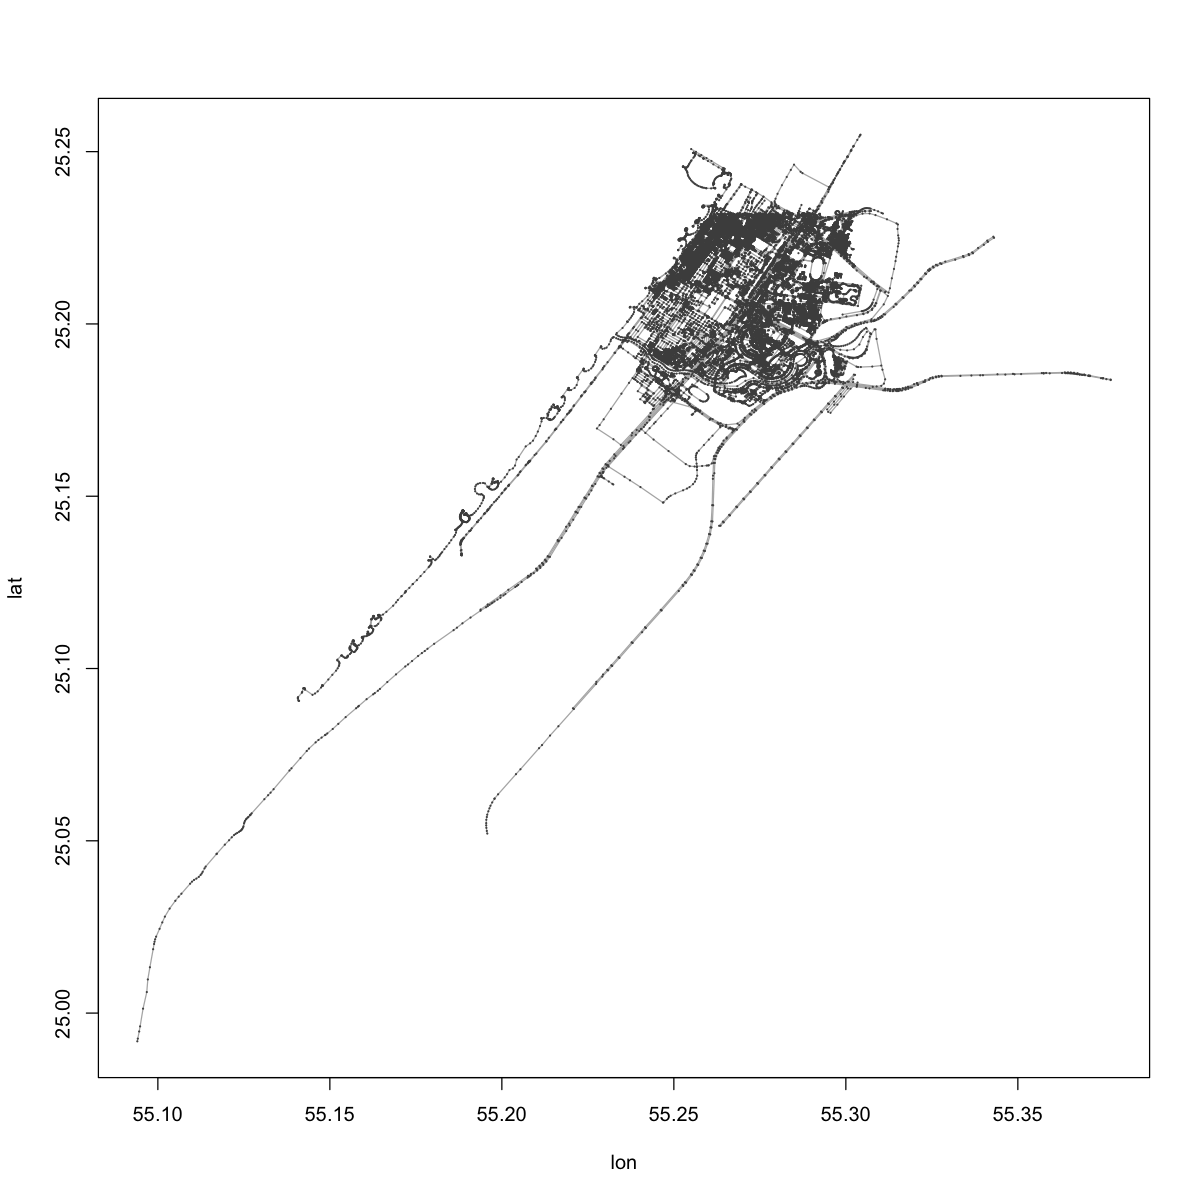

In [93]:
plot(bdubai)

In [94]:
tss <- find(sdubai, node(tags(v == "traffic_signals")))
ts_sdubai <- subset(sdubai, node_ids = tss)

In [95]:
bss <- find(sdubai, node(tags(v %agrep% "busstop")))
bs_sdubai <- subset(sdubai, node_ids = bss)

In [96]:
hws <- find(sdubai, way(tags(k == "highway")))
hws <- find_down(sdubai, way(hws))
hw_sdubai <- subset(sdubai, ids = hws)

In [97]:
tus <- find(sdubai, way(tags(k == "tunnel")))
tus <- find_down(sdubai, way(tus))
tu_sdubai <- subset(sdubai, ids = tus)

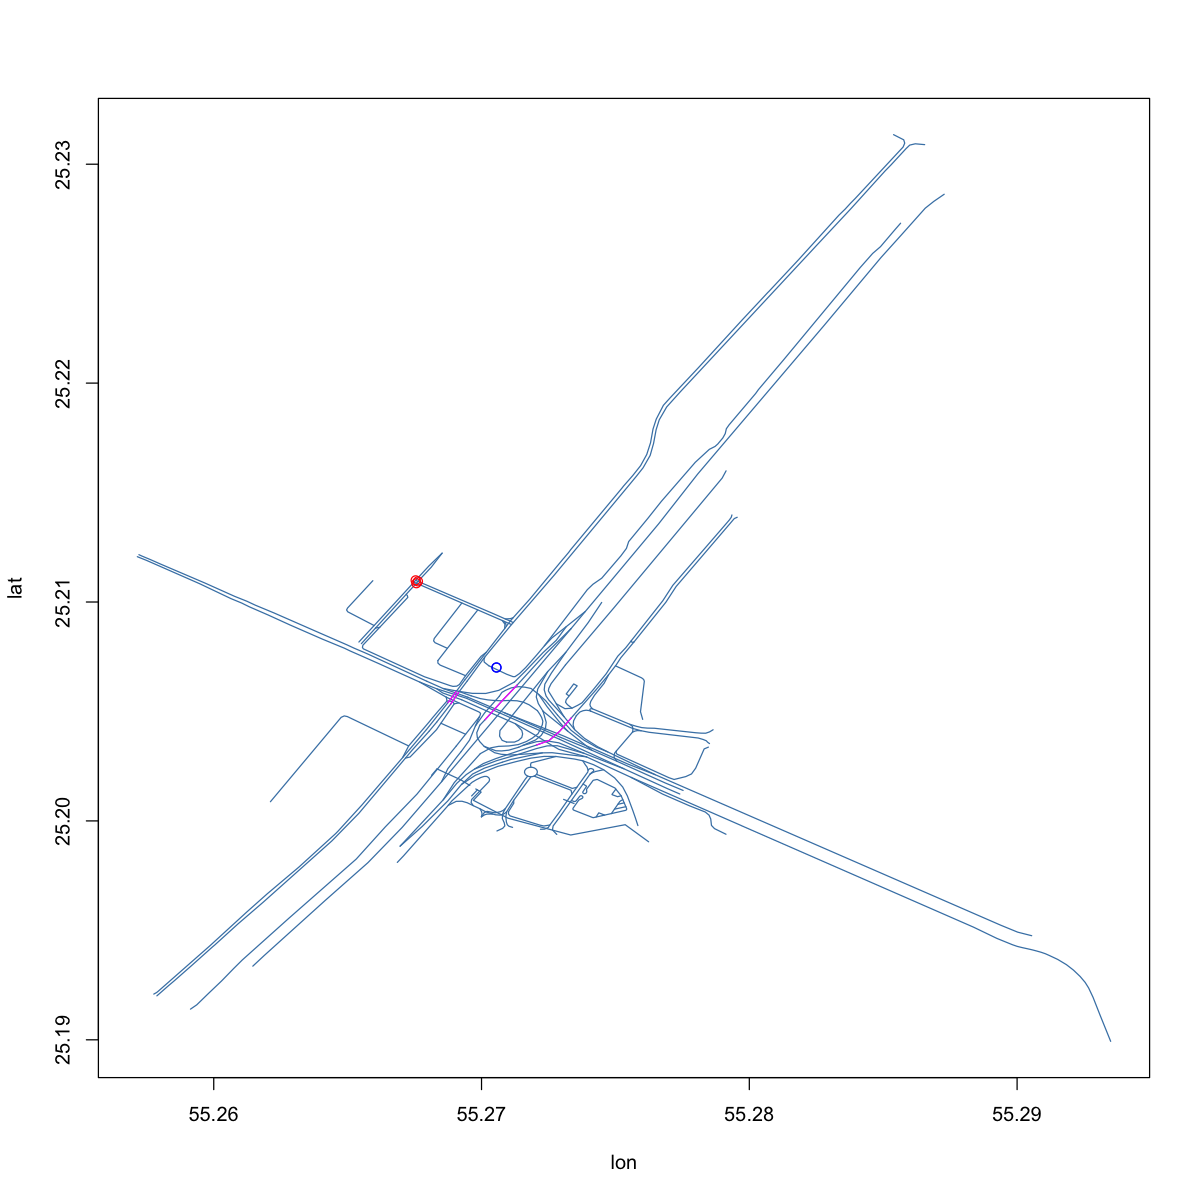

In [98]:
plot_ways(hw_sdubai, col = "steelblue")
plot_ways(tu_sdubai, add = TRUE, col = "magenta")
plot_nodes(ts_sdubai, add = TRUE, col = "red")
plot_nodes(bs_sdubai, add = TRUE, col = "blue")

In [99]:
ts <- find(bdubai, node(tags(v == "traffic_signals")))
ts_dubai <- subset(bdubai, node_ids = ts)

In [100]:
bs <- find(bdubai, node(tags(v %agrep% "busstop")))
bs_dubai <- subset(bdubai, node_ids = bs)

In [101]:
hw <- find(bdubai, way(tags(k == "highway")))
hw <- find_down(bdubai, way(hw))
hw_dubai <- subset(bdubai, ids = hw)

In [102]:
tu <- find(bdubai, way(tags(k == "tunnel")))
tu <- find_down(bdubai, way(tu))
tu_dubai <- subset(bdubai, ids = tu)

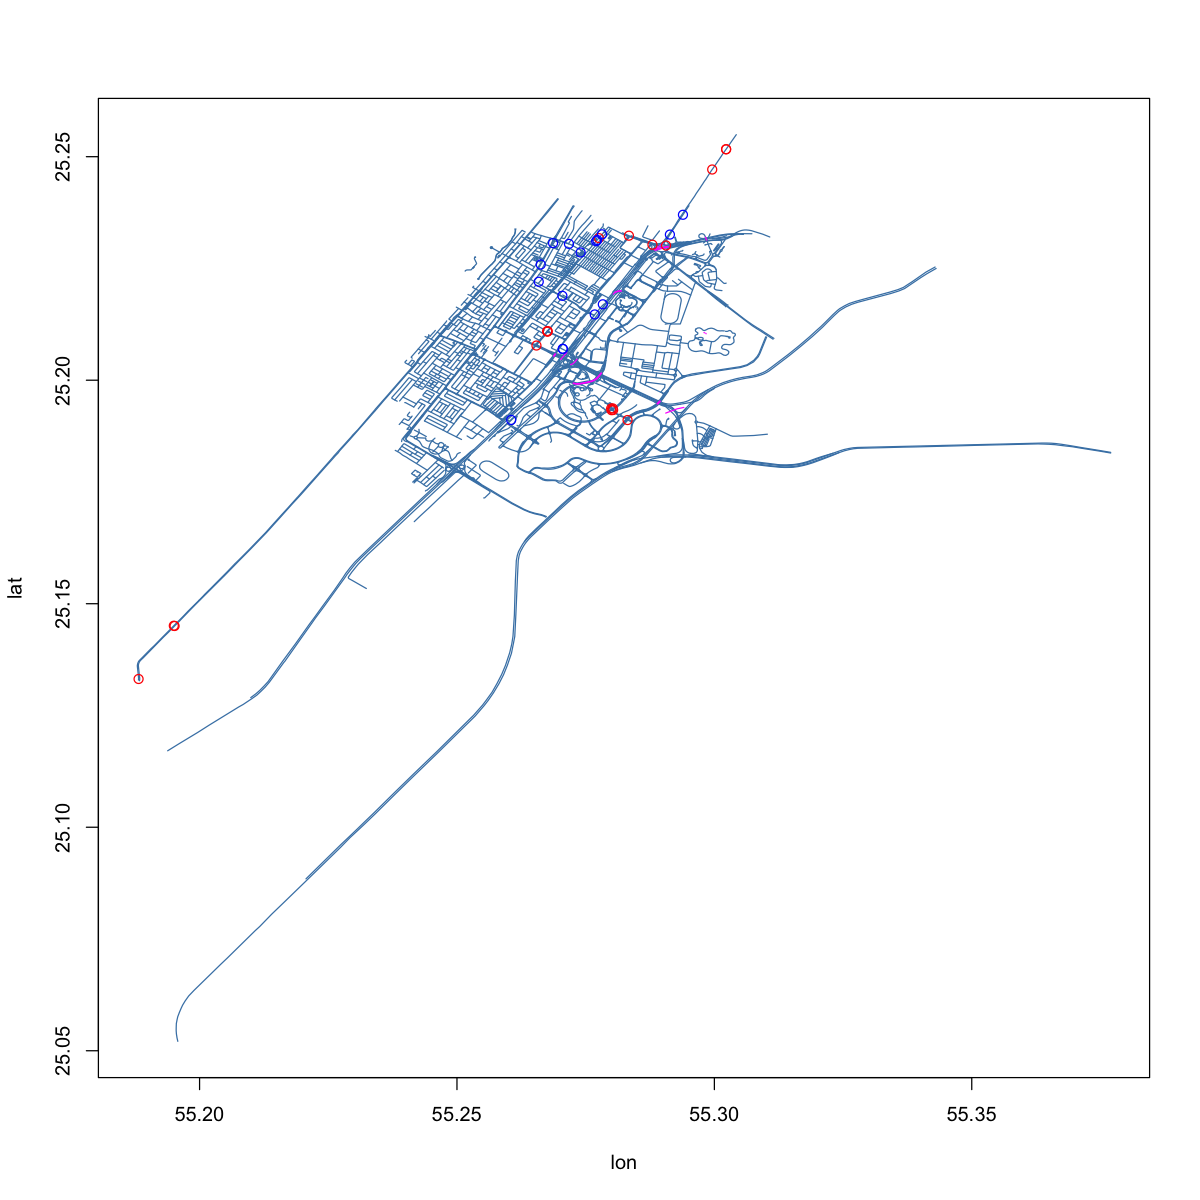

In [103]:
plot_ways(hw_dubai, col = "steelblue")
plot_ways(tu_dubai, add = TRUE, col = "magenta")
plot_nodes(ts_dubai, add = TRUE, col = "red")
plot_nodes(bs_dubai, add = TRUE, col = "blue")

In [104]:
brewer.pal.info["Set3",]$maxcolors

[1] 12

In [105]:
bg <- find(bdubai, way(tags(k == "building")))
bg <- find_down(bdubai, way(bg))
bg_dubai <- subset(bdubai, ids = bg)
bg_poly <- as_sp(bg_dubai, "polygons")

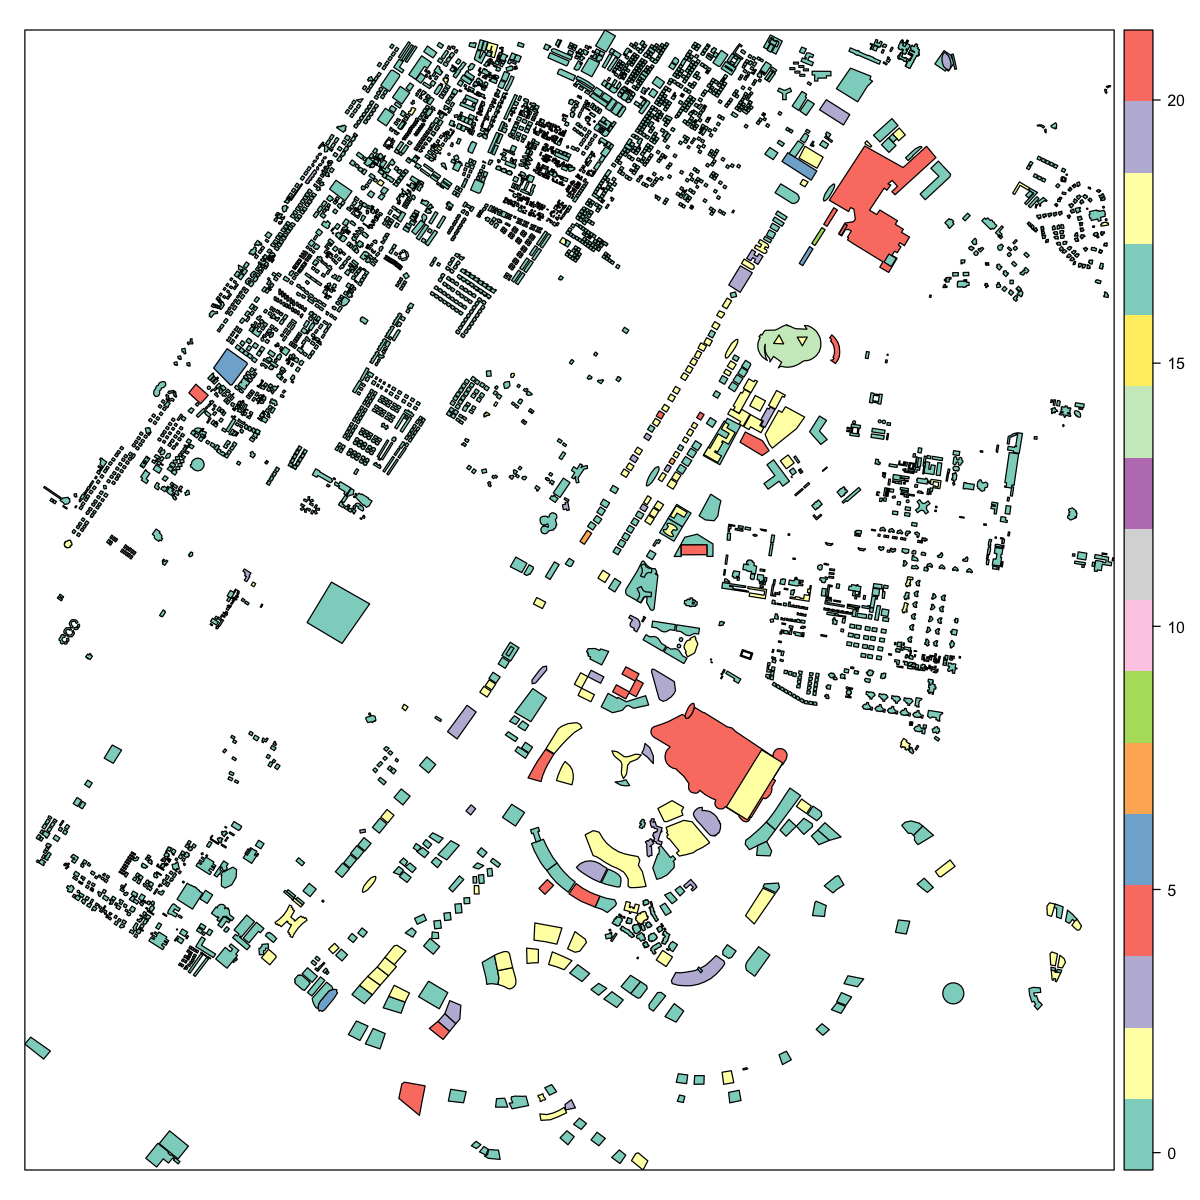

In [106]:
spplot(bg_poly, col.regions=brewer.pal(12, "Set3"), c("version"))

In [107]:
# bus <- find(bdubai, relation(tags(v == "bus")))
# bus_dubai <- lapply(bus, function(i) { as_sp(get_osm(relation(i), full = TRUE), "lines") })

In [108]:
bs_points <- as_sp(bs_dubai, "points")

In [109]:
hw_line <- as_sp(hw_dubai, "lines")

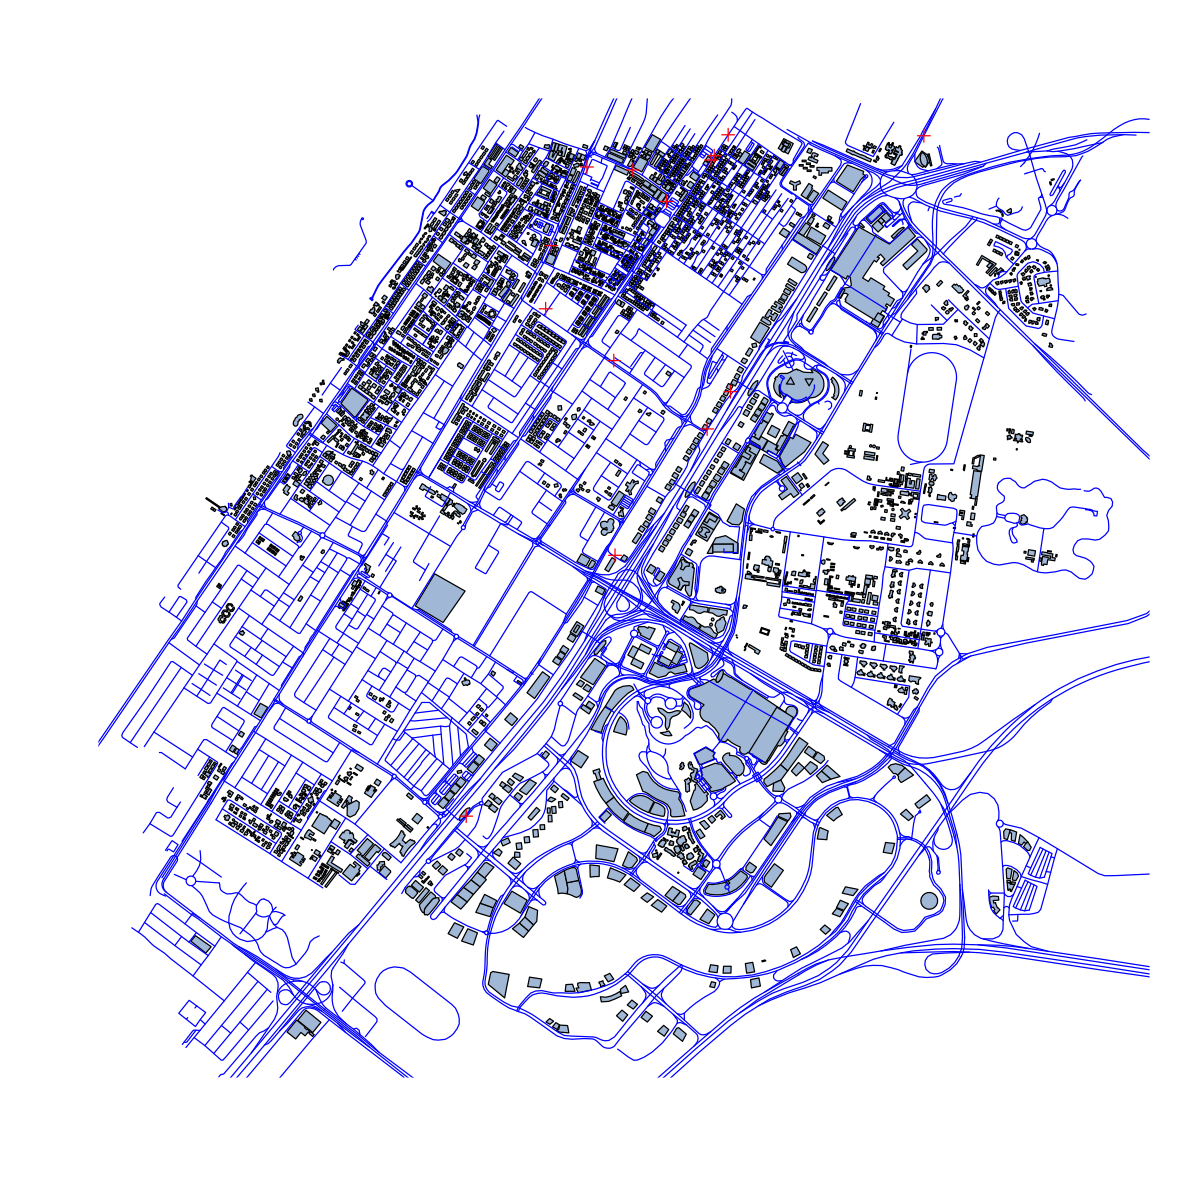

In [110]:
plot(bg_poly, col = "lightsteelblue")
plot(hw_line, add = TRUE, col = "blue")
plot(bs_points, add = TRUE, col = "red")
# for ( i in seq(along = bus_dubai) ) { plot(bus[[i]], add = TRUE, col = "blue") }

#### 1.4. Extract from OpenStreetMaps.org. 
Another possible way is extracting data files in many different formats from the website:
https://mapzen.com/data/metro-extracts/metro/dubai_abu-dhabi/ .
The files dubai_abu-dhabi.osm, dubai_abu-dhabi_buildings.geojson, etc. were downloaded.
The data from the format osm of the file were extracted in formats csv and json using specially designed functions in the programming language python.

Size of the downloaded osm, json and csv file.

#### OSM & JSON

In [111]:
file.size("/Users/olgabelitskaya/large-repo/dubai_abu-dhabi.osm")

[1] 394382598

In [112]:
file.size("/Users/olgabelitskaya/large-repo/dubai_abu-dhabi.osm.json")

[1] 458155339

#### CSV

In [113]:
file.size("/Users/olgabelitskaya/large-repo/nodes.csv")

[1] 154228820

In [114]:
file.size("/Users/olgabelitskaya/large-repo/nodes_tags.csv")

[1] 3912302

In [115]:
file.size("/Users/olgabelitskaya/large-repo/ways.csv")

[1] 13797779

In [116]:
file.size("/Users/olgabelitskaya/large-repo/ways_tags.csv")

[1] 13383027

In [117]:
file.size("/Users/olgabelitskaya/large-repo/ways_nodes.csv")

[1] 55135540

#### 1.5 Osmar sources

In [100]:
source1 <- osmsource_file("dubai_abu-dhabi.osm")

In [101]:
# dubai1 <- get_osm(complete_file(), source=source1)

In [102]:
dubai2 <- osmar:::get_osm_data.osmfile(source1)

In [103]:
dubai2[5]

[1] "\t<node id=\"21133779\" lat=\"25.148038\" lon=\"55.3862105\" version=\"2\" timestamp=\"2011-02-15T02:24:42Z\" changeset=\"7291467\" uid=\"18885\" user=\"Tommy\"/>"

In [109]:
as_osmar(xmlParse(dubai2[5]))$nodes$attrs

id       visible timestamp           version changeset user  uid   lat     
1 21133779 NA      2011-02-15 02:24:42 2       7291467   Tommy 18885 25.14804
  lon     
1 55.38621

In [110]:
get_osm(node(21133779), source = osmsource_api())$nodes$attrs

id       visible timestamp           version changeset user  uid   lat     
1 21133779 true    2011-02-15 02:24:42 2       7291467   Tommy 18885 25.14804
  lon     
1 55.38621

#### 1.6 Osmplotr

In [44]:
# dad_box <- get_bbox(c(55.2608, 25.1948, 55.2808, 25.2148))

In [ ]:
dad_buildings <- extract_osm_objects(key='building', bbox=dad_box)

In [ ]:
dad_highways <- extract_osm_objects(key='highway', bbox=dad_box)

In [ ]:
dad_map <- osm_basemap(bbox = dad_box, bg = 'lightsteelblue')

In [ ]:
dad_map <- add_osm_objects(dad_map, dad_buildings, col = 'steelblue')

In [ ]:
dad_map <- add_osm_objects(dad_map, dad_highways, col = 'blue')

In [ ]:
print_osm_map(dad_map)

#### 1.7 Geojson & leaflet

In [ ]:
buildings_dad <- readLines("/Users/olgabelitskaya/large-repo/dubai_abu-dhabi.imposm-geojson/dubai_abu-dhabi_buildings.geojson") %>% paste(collapse = "\n")

leaflet() %>% setView(lng = 55.2708, lat = 25.2048, zoom = 10) %>%
  addTiles() %>%
  addGeoJSON(buildings_dad, weight = 1, color = "steelblue", fill = FALSE)

### 2. CSV & SQL

#### 2.1. From osmar to csv files

In [124]:
# write.csv(dubai1$nodes$attrs, file = "rnodes.csv")
# file.size("rnodes.csv")

In [125]:
# write.csv(dubai1$nodes$tags, file = "rnodes_tags.csv")
# file.size("rnodes_tags.csv")

In [126]:
# write.csv(dubai1$ways$attrs, file = "rways.csv")
# file.size("rways.csv")

In [127]:
# write.csv(dubai1$ways$tags, file = "rways_tags.csv")
# file.size("rways_tags.csv")

In [128]:
# write.csv(dubai1$ways$refs, file = "rways_refs.csv")
# file.size("rways_refs.csv")

In [129]:
# write.csv(dubai1$relations$attrs, file = "rrelations.csv")
# file.size("rrelations.csv")

In [130]:
# write.csv(dubai1$relation$tags, file = "rrelations_tags.csv")
# file.size("rrelations_tags.csv")

In [131]:
# write.csv(dubai1$relation$refs, file = "rrelations_refs.csv")
# file.size("rrelations_refs.csv")

#### 2.2. From csv files to SQL
The displayed lines of code represent the process of recording information of the CSV files to the SQL database.

Variant #1

In [112]:
sqlite <- dbDriver("SQLite")

In [113]:
dubai_abu_dhabi <- dbConnect(sqlite,"dubai_abu_dhabi.sqlite3")

In [119]:
nodes <- read.csv('nodes.csv')
nodes_tags <- read.csv('nodes_tags.csv')
ways <- read.csv('ways.csv')
ways_tags <- read.csv('ways_tags.csv')
ways_nodes <- read.csv('ways_nodes.csv')

In [135]:
# dbWriteTable(conn = dubai_abu_dhabi, name = 'nodes', value = nodes, row.names = FALSE)

In [136]:
# dbWriteTable(conn = dubai_abu_dhabi, name = 'nodes_tags', value = nodes_tags, row.names = FALSE)

In [137]:
# dbWriteTable(conn = dubai_abu_dhabi, name = 'ways', value = ways, row.names = FALSE)

In [138]:
# dbWriteTable(conn = dubai_abu_dhabi, name = 'ways_tags', value = ways_tags, row.names = FALSE)

In [139]:
# dbWriteTable(conn = dubai_abu_dhabi, name = 'ways_nodes', value = ways_nodes, row.names = FALSE)

In [114]:
dbListTables(dubai_abu_dhabi)

[1] "nodes"      "nodes_tags" "ways"       "ways_nodes" "ways_tags"

In [115]:
dbListFields(dubai_abu_dhabi, 'nodes')

[1] "id"        "lat"       "lon"       "user"      "uid"       "version"  
[7] "changeset" "timestamp"

Variant #2

In [149]:
# sqldf("attach dubai_abu_dhabi as new")

In [150]:
# read.csv.sql("nodes.csv", sql = "create table nodes as select * from file", dbname = "dubai_abu_dhabi")

In [120]:
sqldf("select * from nodes limit 3", dbname = "dubai_abu_dhabi")

id       lat      lon      user  uid   version changeset timestamp           
1 21133776 25.17528 55.39664 Tommy 18885 3        7291467  2011-02-15T02:24:49Z
2 21133779 25.14804 55.38621 Tommy 18885 2        7291467  2011-02-15T02:24:42Z
3 21133785 25.19667 55.30909 Tommy 18885 9       12645525  2012-08-07T13:29:47Z

In [117]:
# read.csv.sql("nodes_tags.csv", sql = "create table nodes_tags as select * from file", dbname = "dubai_abu_dhabi")

In [121]:
sqldf("select * from nodes_tags limit 3", dbname = "dubai_abu_dhabi")

id       key      value           type   
1 21136186 crossing island          regular
2 21136186 highway  traffic_signals regular
3 21161907 operator Eppco           regular

In [122]:
# read.csv.sql("ways.csv", sql = "create table ways as select * from file", dbname = "dubai_abu_dhabi")

In [123]:
sqldf("select * from ways limit 3", dbname = "dubai_abu_dhabi")

id      user     uid     version changeset timestamp           
1 4009554 rehan727 2952340 25      42505170  2016-09-28T21:02:31Z
2 4334711 4b696d   1420318 21      28096059  2015-01-12T19:49:12Z
3 4340534 wk2      1808544 18      18943947  2013-11-16T22:28:53Z

In [124]:
# read.csv.sql("ways_tags.csv", sql = "create table ways_tags as select * from file", dbname = "dubai_abu_dhabi")

In [125]:
sqldf("select * from ways_tags limit 3", dbname = "dubai_abu_dhabi")

id      key     value               type   
1 4009554 bridge  yes                 regular
2 4009554 lanes   no|no|no|no|yes|yes hgv    
3 4009554 highway motorway            regular

In [126]:
# read.csv.sql("ways_nodes.csv", sql = "create table ways_nodes as select * from file", dbname = "dubai_abu_dhabi")

In [127]:
sqldf("select * from ways_nodes limit 3", dbname = "dubai_abu_dhabi")

id      node_id  position
1 4009554 90031463 0       
2 4009554 90028252 1       
3 4009554 21133804 2

#### 2.3 SQL quering

In [128]:
query001 = "SELECT COUNT(*) FROM nodes;"
query002 = "SELECT COUNT(*) FROM ways;"

The number of nodes:

In [129]:
sqldf(query001)

COUNT(*)
1 1890178

The number of ways:

In [130]:
sqldf(query002)

COUNT(*)
1 234327

The number of users:

In [131]:
print(sqldf("SELECT COUNT(DISTINCT(e.uid)) FROM (SELECT uid FROM nodes UNION ALL SELECT uid FROM ways) e;"))

  COUNT(DISTINCT(e.uid))
1                   1885


The database allows to evaluate the contribution of each individual user in map editing.

Let us list the 3 most active editors of this map section:

In [132]:
formattable(sqldf("SELECT e.user, COUNT(*) as num \
             FROM (SELECT user FROM nodes UNION ALL SELECT user FROM ways) e \
             GROUP BY e.user \
             ORDER BY num DESC \
             LIMIT 3;"))

user        num   
1 eXmajor     492808
2 chachafish  156874
3 Seandebasti 125767

A list of the 3 most common types of places:

In [133]:
formattable(sqldf("SELECT value, COUNT(*) as num \
            FROM nodes_tags \
            WHERE key='place' \
            GROUP BY value \
            ORDER BY num DESC \
            LIMIT 3;"))

value    num
1 village  608
2 locality 507
3 suburb   144

A list of the 10 most common types of buildings:

In [134]:
formattable(sqldf("SELECT value, COUNT(*) as num \
            FROM nodes_tags \
            WHERE key='building' \
            GROUP BY value \
            ORDER BY num DESC \
            LIMIT 10;"))

value       num
1  yes         78 
2  mosque      50 
3  hut         41 
4  residential 37 
5  apartments  14 
6  commercial   7 
7  entrance     7 
8  university   7 
9  public       6 
10 industrial   5

A list of the 10 most common facilities:

In [135]:
formattable(sqldf("SELECT value, COUNT(*) as num \
            FROM nodes_tags \
            WHERE key='amenity' \
            GROUP BY value \
            ORDER BY num DESC \
            LIMIT 10;"))

value            num 
1  restaurant       1310
2  parking           596
3  fast_food         427
4  cafe              392
5  place_of_worship  362
6  pharmacy          310
7  bank              290
8  fuel              274
9  atm               216
10 bench             215

A list of the 20 most common streets:

In [137]:
formattable(sqldf("SELECT value, COUNT(*) as num \
            FROM nodes_tags \
            WHERE key='street' \
            GROUP BY value \
            ORDER BY num DESC \
            LIMIT 20;"))

value                            num
1  Al Taawun Street                 48 
2  Sheikh Zayed Road                23 
3  Sheikh Mohammed bin Zayed Road   21 
4  Al Ramth                         20 
5  Al Ettihad Road                  14 
6  King Faisal Street               13 
7  Yas Leisure Drive                11 
8  Paragon Mall, Reem Island        10 
9  Al Fahidi (19th) Street           9 
10 Sheikh Zayed The First Street     9 
11 Corniche Road West                8 
12 Hamdan Street                     8 
13 Yas Mall                          8 
14 King Abdul Aziz St.               7 
15 10 B Street                       6 
16 Al Meena Street                   6 
17 Al Raffa Street                   6 
18 Al Thammam                        6 
19 Hazaa Bin Zayed The First Street  6 
20 Jumeirah Beach Road               6

In [139]:
# dbDisconnect(dubai_abu_dhabi)

### 3. JSON & Mongo DB

With very similar manipulations we can import the data from JSON files into MongoDB.

In [289]:
# Run mongod from terminal

Variant #1

In [ ]:
mg1 <- mongoDbConnect('test')

Variant #2

Let's explore the dataset with the 'mongolite' package.

In [140]:
m <- mongo("openstreetmap", verbose = FALSE)

In [141]:
# stream_in(file("dubai_abu-dhabi.osm.json"), handler = function(df){m$insert(df)})

The number of documents:

In [147]:
m$count()

[1] 2124505

The three most active editors of this map section:

In [150]:
m$aggregate('[
    { "$group" : {"_id" : "$created.user", "count" : { "$sum" : 1} } }, 
    { "$sort" : {"count" : -1} }, { "$limit" : 3 } 
]')

_id         count 
1 eXmajor     492808
2 chachafish  156874
3 Seandebasti 125767

The number of users with one note and the list of 10 users with only one note:

In [151]:
m$aggregate('[
    { "$group" : {"_id" : "$created.user", "count" : { "$sum" : 1} } },
    { "$group" : {"_id" : "$count", "num_users": { "$sum" : 1} } },
    { "$sort" : {"_id" : 1} }, { "$limit" : 1} 
]')

_id num_users
1 1   646

In [153]:
m$aggregate('[
    { "$group" : {"_id" : "$created.user", "count" : { "$sum" : 1} } }, 
    { "$sort" : {"count" : 1} }, { "$limit" : 10 } 
]')

_id                count
1  ganesh reddy       1    
2  Msmsms99           1    
3  Rjensky            1    
4  thajudeen n        1    
5  aceman444          1    
6  Haseeb1973         1    
7  IňnôÇëňt Rähúl Päl 1    
8  Khadar Mohaideen   1    
9  Niyas Badarudeen   1    
10 Emma Danny         1

A list of 3 most common places:

In [154]:
m$aggregate('[
    { "$match" : { "address.place" : { "$exists" : 1} } }, 
    { "$group" : { "_id" : "$address.place", "count" : { "$sum" : 1} } },  
    { "$sort" : { "count" : -1}}, {"$limit":3}
]')

_id                                   count
1 Yas Mall                              14   
2 Jumeirah Village Triangle             10   
3 Deerfields Townsquare Shopping Centre  2

A list of 10 most common types of buildings:

In [156]:
m$aggregate('[
    { "$match": { "building": { "$exists": 1}}}, 
    { "$group": { "_id": "$building", "count": { "$sum": 1}}}, 
    { "$sort": { "count": -1}}, {"$limit": 10}
]')

_id         count
1  yes         43834
2  house        4216
3  apartments   2910
4  residential  2606
5  roof         1026
6  hangar        825
7  warehouse     380
8  mosque        378
9  garage        314
10 commercial    313

A list of 10 most common facilities:

In [157]:
m$aggregate('[
    { "$match": { "amenity": { "$exists": 1}}}, 
    { "$group": { "_id": "$amenity", "count": { "$sum": 1}}},
    { "$sort": { "count": -1}}, { "$limit": 10}
]')

_id              count
1  parking          5602 
2  place_of_worship 1443 
3  restaurant       1372 
4  school            489 
5  fast_food         442 
6  fuel              438 
7  cafe              403 
8  bank              317 
9  pharmacy          311 
10 shelter           247

A list of 3 most common zipcodes:

In [158]:
m$aggregate('[ 
    { "$match" : { "address.postcode" : { "$exists" : 1} } }, 
    { "$group" : { "_id" : "$address.postcode", "count" : { "$sum" : 1} } },  
    { "$sort" : { "count" : -1}}, {"$limit": 3}
]')

_id    count
1 811    5    
2 473828 4    
3 24857  3

Counting zipcodes with one document:

In [159]:
m$aggregate(' [ 
    { "$group" : {"_id" : "$address.postcode", "count" : { "$sum" : 1} } },
    { "$group" : {"_id" : "$count", "count": { "$sum" : 1} } },
    { "$sort" : {"_id" : 1} }, { "$limit" : 1} 
]')

_id count
1 1   85

Examples of statistics indicators for this dataset:

In [143]:
m$info()$stats$ns

[1] "test.openstreetmap"

In [144]:
m$info()$stats$size

[1] 502488587

In [145]:
m$info()$stats$avgObjSize

[1] 236

In [146]:
m$info()$stats$storageSize

[1] 155140096

### 4. Problems and errors

#### 4.1 
One of the main problems of public maps - no duplication of all place names in other languages. If it were possible to automate the translation process by increasing a common database of map names in many languages, it would save users from many difficulties and mistakes.

##### 4.2
The next problem - the presence of a large number of databases (including mapping) on the same map objects. Some intergraph procedures of already available data would relieve a lot of people from unnecessary work, save time and effort.

##### 4.3
Obviously, the information about the number of buildings and their purpose is incomplete. Completeness of public maps can be increased by bringing in the process of mapping new users. For this goal enter the information should be as simple as possible: for example, a choice of the available options with automatic filling many fields for linked options (for example, linking the name of the street and the administrative area in which it is located).

##### 4.4 
There are a number of mistakes and typos as in every public data. For correction them well-known methods can be proposed: automatic comparison with existing data and verification for new data by other users.

##### 4.5
The lack of a uniform postal code system in this concrete dataset complicates their identification and verification.

#### 4.6
During working on the project, I spent a lot of time on the conversion of one type of data file to another. Each format has its own advantages and disadvantages. Probably, it is possible to design a universal file type that allows us to store data of any kind, combining the advantages of all existing types and applicable in the most of existing programming languages.

#### 4.7
Correction of errors made in the data seems to me appropriate to carry out after uploading files to the database. Sometimes a record that is a mistake in terms of filling a particular type of data just contains additional information about geoobjects.

### 5. Data Overview

#### 5.1 Description of the data structure: 
1) nodes -  points in space with basic characteristics (lat, long, id, tags);

2) ways - defining linear features and area boundaries (an ordered list of nodes);

3) relations - tags and also an ordered list of nodes, ways and/or relations as members which is used to define logical or geographic relationships between other elements.

#### 5.2 Indicators.
1) Size of the .osm file: 394,4 MB.

2) Size of the .osm sample file : 3,9 MB.

3) Nodes: 1890178.

4) Ways: 234327.

5) Relations: 2820.

6) Tags: 503027.

7) Users: 1895.

#### 5.3 SQL & MongoDB
With the help of a specific set of commands we can perform a statistical description of the data collections and the database.

### 6. Conclusion

I think this project is educational for me. I believe that one of the main tasks in this case was to study the methods of extraction and researching of map data in open access. For example, I used a systematic sample of elements from the original .osm file for trying functions of processing before applying them to the whole dataset. As a result I have some new useful skills in parsing, processing, storing, aggregating and applying the data.

In the research I have read through quite a lot of projects of other students on this topic. After my own research and review the results of other authors I have formed a definite opinion about the ideas in OpenStreetMap.

This website can be viewed as a testing ground of interaction of a large number of people (ncluding non-professionals) to create a unified information space. The prospects of such cooperation can not be overemphasized. The success of the project will allow to implement the ambitious plans in the field of available information technologies, the creation of virtual reality and many other areas.

Increasing of the number of users leads to many positive effects in this kind of projects:

1) a rapid improvement in the accuracy, completeness and timeliness of information;

2) approximation of the information space to the reality , the objectivity of the data evaluation;

3) reduce the effort for data cleansing on erroneous details.

Ideas for improving the project OpenStreetMap are simple and natural.

Increasing the number of users can be achieved by additional options like marks of the rating evaluation (eg, the best restaurant or the most convenient parking).

The popularity of the project may be more due to the temporary pop-up messages of users (placement is not more than 1-3 hours) with actual information about the geographic location (eg, the presence of traffic jams).

### 7. Addition

I expanded a little bit the circle of the challenges facing the project (graphic displaying the data, the study of other types of files, etc.). I hope this will not prevent the project to meet the specification.